<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Monitor-Stress-Level-Using-HRV-And-Neural-Network/blob/main/Monitoring_Stress_Level_using_HRV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qiriro/swell-heart-rate-variability-hrv")

print("Path to dataset files:", path)

100%|██████████| 233M/233M [00:12<00:00, 19.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/qiriro/swell-heart-rate-variability-hrv/versions/1


In [ ]:
import os
print("Dataset Contents:", os.listdir(path))

Dataset Contents: ['hrv dataset']


In [ ]:
#dir=f'{path}+'/hrv dataset''
dir=f'{path}/hrv dataset'

In [ ]:
print(os.listdir(dir))

['data', 'hrv dataset', 'papers', 'quick_start.py']


In [ ]:
folder=f'{dir}/data'

In [ ]:
print(os.listdir(folder))

['raw', 'final']


In [ ]:
final=f'{folder}/final'

In [ ]:
print(os.listdir(final))

['train.csv', 'test.csv']


In [ ]:
train=f'{final}/train.csv'
test=f'{final}/test.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv(train)
df_test=pd.read_csv(test)

In [ ]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [ ]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,10.593708,...,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,2.062471,1.182292,2.0
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,2.914795,...,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,0.206999,0.062192,0.0
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,3.911344,...,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,0.434576,1.033984,2.0
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,8.368340,...,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,2.032977,1.139929,2.0
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,10.196621,...,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,2.134214,1.174293,2.0
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,12.679005,...,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,2.181929,1.223621,2.0
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,18.836107,...,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043,2.234841,1.361219,2.0


In [ ]:
df_train.isnull().sum()

,0
MEAN_RR,0
MEDIAN_RR,0
SDRR,0
RMSSD,0
SDSD,0
SDRR_RMSSD,0
HR,0
pNN25,0
pNN50,0
SD1,0


In [ ]:

label_column = df_train['condition']


In [ ]:
unique_conditions = df_train['condition'].unique()
print("Unique Conditions:", unique_conditions)


Unique Conditions: ['no stress' 'interruption' 'time pressure']


In [ ]:
condition_counts = df_train['condition'].value_counts()
print("Number of instances for each condition:\n", condition_counts)


Number of instances for each condition:
 condition
no stress        200082
interruption     105150
time pressure     64057
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Separate the data into groups based on the 'condition' column
condition_groups = df_train.groupby('condition')

# Determine the size of the smallest group
min_group_size = condition_counts.min()

# Create a list to store the balanced datasets
balanced_datasets = []

# Iterate through each condition group and downsample if necessary
for condition, group in condition_groups:
    if len(group) > min_group_size:
        # Downsample the larger groups
        downsampled_group = resample(group,
                                     replace=False,
                                     n_samples=min_group_size,
                                     random_state=42)
        balanced_datasets.append(downsampled_group)
    else:
        balanced_datasets.append(group)

# Combine the balanced datasets into a single DataFrame
balanced_df_train = pd.concat(balanced_datasets)

# Verify the counts for each condition are now balanced
print("Number of instances for each condition after balancing:\n", balanced_df_train['condition'].value_counts())

# You can now use 'balanced_df_train' for your model training
# It contains a balanced representation of each condition


Number of instances for each condition after balancing:
 condition
interruption     64057
no stress        64057
time pressure    64057
Name: count, dtype: int64


In [ ]:
balanced_df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
247863,985.379589,1001.032100,115.187659,21.015903,21.015901,5.480976,61.808070,25.333333,1.600000,14.865445,...,7.285179,0.179353,0.404615,4061.924958,246.148321,0.004063,2.128578,1.213811,2,interruption
152948,984.266756,985.807690,131.200039,18.968716,18.967181,6.916654,62.090386,16.266667,1.600000,13.416298,...,5.114185,0.104814,0.367757,4879.317889,270.918928,0.003691,2.171639,1.134100,2,interruption
112877,757.304503,750.486305,84.142277,25.787797,25.787716,3.262872,80.208837,34.200000,4.733333,18.240754,...,141.165789,3.325395,4.420927,4245.083092,21.619688,0.046254,2.207975,1.227747,2,interruption
154708,866.485853,868.635220,91.836812,21.527471,21.527385,4.266029,70.061234,26.533333,1.066667,15.227240,...,40.032000,1.179739,1.994804,3393.291643,49.130246,0.020354,2.185531,1.220780,2,interruption
340849,825.343983,836.439270,88.972832,14.858722,14.858700,5.987919,73.615521,8.000000,1.066667,10.510194,...,20.726549,0.565715,2.065991,3663.779028,47.402911,0.021096,2.144899,1.121289,2,interruption


In [ ]:
balanced_df_train.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
count,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,...,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.000000,192171.0
mean,867.318214,863.187941,113.900043,15.257246,15.256523,7.493477,72.297686,10.316940,0.919502,10.791591,...,95.989231,36.009524,1.442600,4.010769,3385.552791,149.629548,0.043671,2.074929,1.178229,2.0
std,129.951424,136.163103,77.203046,4.078781,4.078716,4.796589,10.496905,8.170585,1.023022,2.885050,...,3.918143,43.184796,1.649690,3.918143,2053.908815,467.045083,0.046430,0.182381,0.063488,0.0
min,547.510003,517.471080,27.233947,5.540308,5.540127,2.660381,48.737243,0.000000,0.000000,3.918769,...,69.895046,0.061783,0.002150,0.012825,380.724910,2.321712,0.000128,0.434830,1.033984,2.0
25%,775.025970,770.724220,65.478821,12.135446,12.135118,4.703648,64.642408,4.133333,0.066667,8.583688,...,94.162788,9.165545,0.262995,0.999715,1890.803308,16.131466,0.010098,2.042426,1.135742,2.0
50%,845.121563,841.968135,87.115408,14.762815,14.761632,6.092934,72.118584,8.200000,0.533333,10.441533,...,97.111175,22.211818,0.880247,2.888825,2950.527332,33.616148,0.029748,2.134718,1.172724,2.0
75%,950.233174,944.542275,126.485342,18.159701,18.159260,8.142136,78.567026,14.066667,1.533333,12.844821,...,99.000285,41.558625,1.991607,5.837212,4339.544145,99.028547,0.061991,2.183010,1.220204,2.0
max,1322.011555,1653.122250,563.433861,26.629477,26.629392,54.354468,113.748581,39.400000,5.400000,18.836107,...,99.987175,364.486936,13.092043,30.104954,13383.174966,7796.443096,0.430717,2.234841,1.361219,2.0


In [ ]:
label_mapping = {
    'no stress': 0,  # Example label mapping
    'interruption': 1,  # Example label mapping
    'time pressure': 2  # Example label mapping
    # Add mappings for other unique labels in your 'condition' column
}

# Replace labels in the 'condition' column with numerical values
balanced_df_train['condition_numerical'] = balanced_df_train['condition'].map(label_mapping)

# Verify the changes
print(balanced_df_train[['condition', 'condition_numerical']].head())

           condition  condition_numerical
247863  interruption                    1
152948  interruption                    1
112877  interruption                    1
154708  interruption                    1
340849  interruption                    1


In [ ]:
balanced_df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition,condition_numerical
247863,985.379589,1001.032100,115.187659,21.015903,21.015901,5.480976,61.808070,25.333333,1.600000,14.865445,...,0.179353,0.404615,4061.924958,246.148321,0.004063,2.128578,1.213811,2,interruption,1
152948,984.266756,985.807690,131.200039,18.968716,18.967181,6.916654,62.090386,16.266667,1.600000,13.416298,...,0.104814,0.367757,4879.317889,270.918928,0.003691,2.171639,1.134100,2,interruption,1
112877,757.304503,750.486305,84.142277,25.787797,25.787716,3.262872,80.208837,34.200000,4.733333,18.240754,...,3.325395,4.420927,4245.083092,21.619688,0.046254,2.207975,1.227747,2,interruption,1
154708,866.485853,868.635220,91.836812,21.527471,21.527385,4.266029,70.061234,26.533333,1.066667,15.227240,...,1.179739,1.994804,3393.291643,49.130246,0.020354,2.185531,1.220780,2,interruption,1
340849,825.343983,836.439270,88.972832,14.858722,14.858700,5.987919,73.615521,8.000000,1.066667,10.510194,...,0.565715,2.065991,3663.779028,47.402911,0.021096,2.144899,1.121289,2,interruption,1


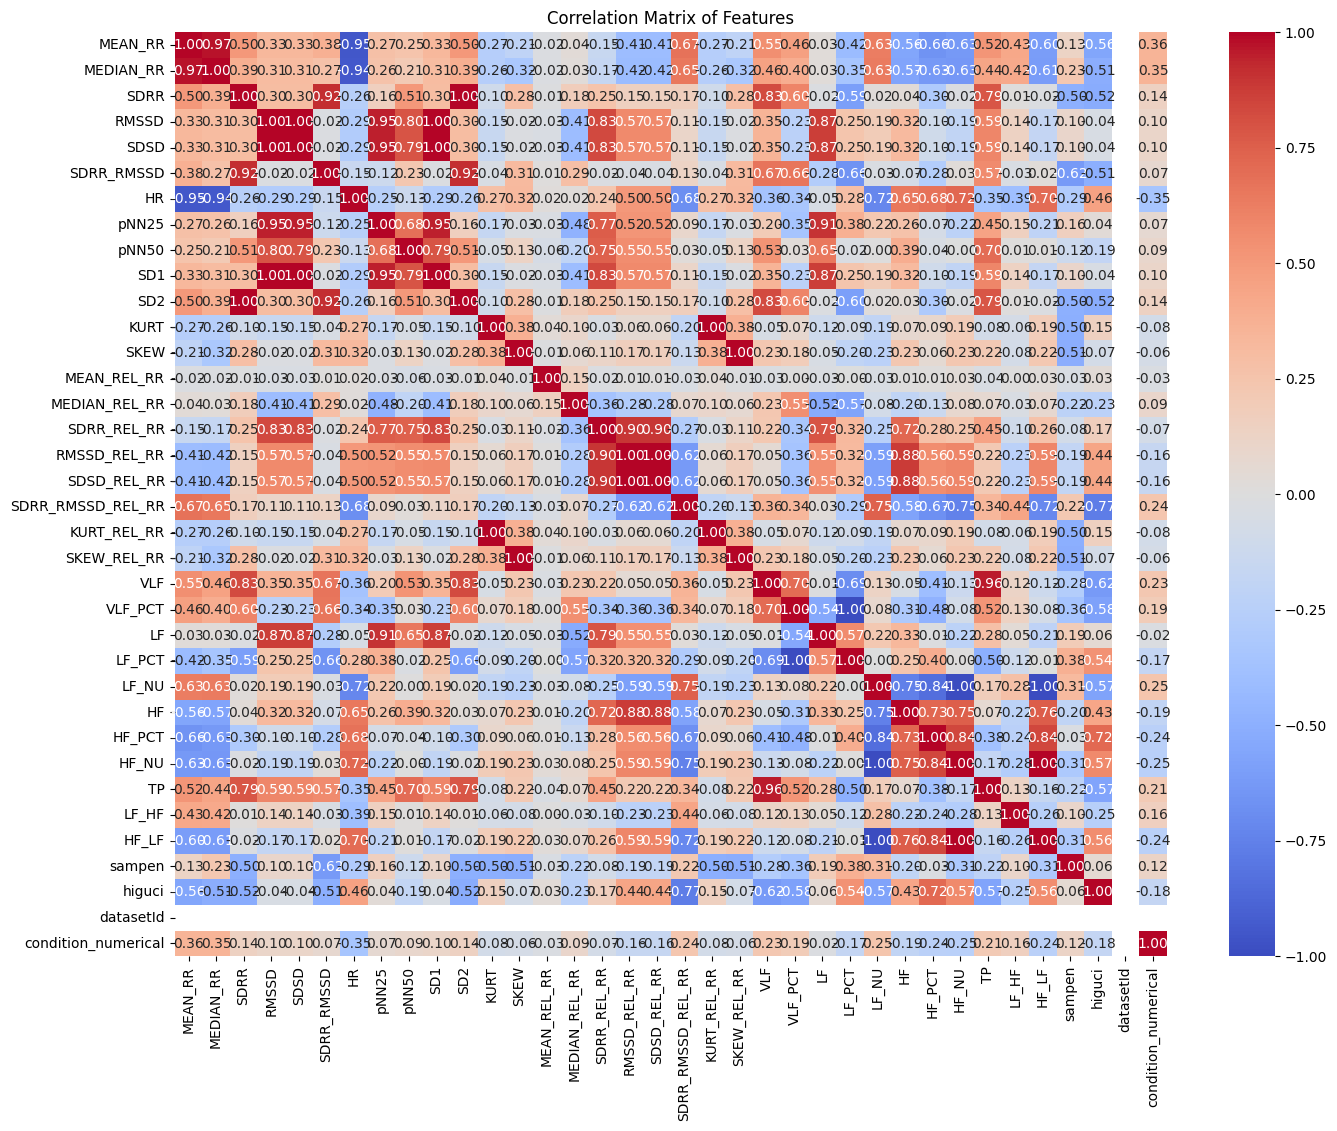

Features most correlated with the target variable:
 condition_numerical    1.000000
MEAN_RR                0.359370
MEDIAN_RR              0.353738
LF_NU                  0.245497
SDRR_RMSSD_REL_RR      0.239974
VLF                    0.228253
TP                     0.209116
VLF_PCT                0.189044
LF_HF                  0.163313
SD2                    0.140995
SDRR                   0.140884
sampen                 0.121528
SDSD                   0.102971
SD1                    0.102971
RMSSD                  0.102970
MEDIAN_REL_RR          0.094548
pNN50                  0.089567
SDRR_RMSSD             0.070578
pNN25                  0.067321
LF                    -0.022678
MEAN_REL_RR           -0.029346
SKEW_REL_RR           -0.063626
SKEW                  -0.063626
SDRR_REL_RR           -0.072898
KURT_REL_RR           -0.081083
KURT                  -0.081083
RMSSD_REL_RR          -0.161061
SDSD_REL_RR           -0.161062
LF_PCT                -0.172778
higuci              

In [ ]:
# Correlation matrix to find relationships between features
#correlation_matrix = balanced_df_train.corr()
correlation_matrix = balanced_df_train.drop(columns=['condition']).corr()


# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Find features most correlated with the target variable (e.g., 'condition')
target_correlation = correlation_matrix['condition_numerical'].sort_values(ascending=False)

# Print the features most correlated with the target variable
print("Features most correlated with the target variable:\n", target_correlation)

# You can also use feature importance from tree-based models like Random Forest
# to identify features that have the most impact on prediction.

# Example using Random Forest (you'll need to import it):
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X = balanced_df_train.drop('condition', axis=1)  # Features
# y = balanced_df_train['condition']  # Target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# feature_importances.sort_values(ascending=False, inplace=True)

# print("Feature Importance from Random Forest:\n", feature_importances)

# You can then use this information to make decisions about which features to
# include in your model or to perform further feature engineering.


In [ ]:
num_features = balanced_df_train.shape[1]
print("Number of features in the dataset:", num_features)

Number of features in the dataset: 37


In [ ]:
target_correlation.shape

(36,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# ... (previous code for data loading and preparation)

# 1. Get feature importances from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(balanced_df_train.drop(columns=['condition', 'condition_numerical']), balanced_df_train['condition_numerical'])
feature_importances = pd.Series(rf_model.feature_importances_, index=balanced_df_train.drop(columns=['condition', 'condition_numerical']).columns)
feature_importances.sort_values(ascending=False, inplace=True)

# 2. Select top k features (e.g., k=10)
selected_features = feature_importances.head(10).index

# 3. Train and evaluate model with selected features using cross-validation
X_selected = balanced_df_train[selected_features]
y = balanced_df_train['condition_numerical']
scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring='accuracy')  # Use appropriate scoring metric

# 4. Compare performance with model using all features
X_all = balanced_df_train.drop(columns=['condition', 'condition_numerical'])
scores_all = cross_val_score(rf_model, X_all, y, cv=5, scoring='accuracy')

# 5. Print and compare results
print("Accuracy with selected features:", scores.mean())
print("Accuracy with all features:", scores_all.mean())

Accuracy with selected features: 0.9999947962741323
Accuracy with all features: 1.0


In [ ]:
X_selected.head()

,MEDIAN_RR,HR,MEAN_RR,SDRR_RMSSD,pNN25,higuci,MEDIAN_REL_RR,SD2,pNN50,VLF
247863,1001.032100,61.808070,985.379589,5.480976,25.333333,1.213811,-0.001321,162.220257,1.600000,2261.405191
152948,985.807690,62.090386,984.266756,6.916654,16.266667,1.134100,0.000811,185.059189,1.600000,3488.674225
112877,750.486305,80.208837,757.304503,3.262872,34.200000,1.227747,-0.002032,117.588777,4.733333,1051.956942
154708,868.635220,70.061234,866.485853,4.266029,26.533333,1.220780,-0.001427,128.981127,1.066667,1386.477645
340849,836.439270,73.615521,825.343983,5.987919,8.000000,1.121289,0.001334,125.386863,1.066667,2660.553706


In [ ]:
VLF PNN50 SD2 Meadian_RR HRMean_rR SDRR_RMSSD